## Import the necessary libraries

In [1]:
import pandas as pd
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn environment
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

--------------------------------

# Linear regression



### 1. What is Linear Regression?

- models a linear relationship between at least one explanatory variable $x$ (feature) and an outcome variable $y$ (target):
$\newline$
$$
y = w_0 + w_1x + \epsilon
$$
$\newline$
where
>- $w_0$ is the intercept or bias 
>- $w_1$ is the coefficient or slope  (how much y changes for each unit of x)
>- $\epsilon$ is randomly distributed error term

### Why is this useful?
* Predicting metric variables is common place in data science
* The results are easily interpretable


--------------------------------------

##  Linear regression with scikit learn and the Penguins.

## Define Business Goal
Train a linear regresssion model to predict `Body mass` from `Flipper Length`


## Read the Data as a Dataframe

In [22]:
penguins = pd.read_csv("./data/penguins_simple.csv", sep=";")

## Check the info of the data

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


## Do you have any null values? Any duplicates?

In [7]:
penguins.isnull().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [27]:
penguins.columns=penguins.columns.str.lower().str.replace(" ", "_")

In [25]:
penguins.columns= penguins.columns.str.replace("(g)","")

In [28]:
penguins

,species,culmen_length_,culmen_depth_,flipper_length_,body_mass_,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


## Train/Test split

In [29]:
penguins

,species,culmen_length_,culmen_depth_,flipper_length_,body_mass_,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


### Define X and y

In [39]:
X= penguins[["flipper_length_"]]
X

,flipper_length_
0,181.0
1,186.0
2,195.0
3,193.0
4,190.0
...,...
328,214.0
329,215.0
330,222.0
331,212.0


In [40]:
y = penguins["body_mass_"] #dependent variable, target
y

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
328    4925.0
329    4850.0
330    5750.0
331    5200.0
332    5400.0
Name: body_mass_, Length: 333, dtype: float64

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=69) #splittin the data into train and test dataset

## Exploratory Data Analysis
We need to recombine the Xtrain and ytrain to make 

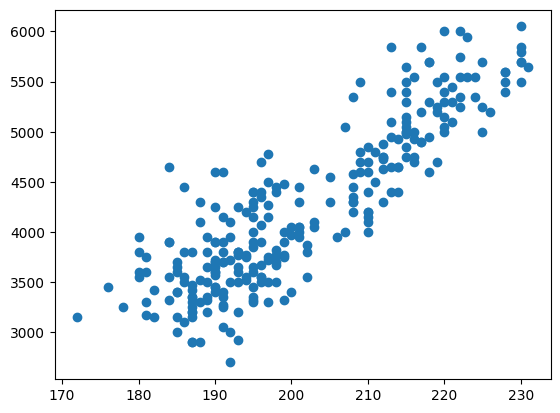

In [42]:
#let's check the flipper length vs body mass
plt.scatter(Xtrain["flipper_length_"], ytrain);

## Feature Engineering


+ No missing values allowed --> impute
+ For categorical variables: one-hot-encoding
+ For numerical variables: better if scaled

## Train Model(s)


In [44]:
model = LinearRegression().fit(Xtrain, ytrain)


In [45]:
# Train the model and fitting is the same 

model.fit(Xtrain,ytrain)   #Our model learns model parameters, slope and intercept

LinearRegression()

## Evaluate the model(s)
The `.score()` method for the linear regression model corresponds to R-squared.


#### **R-squared** 
R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
So, a r-squared value of 1.0 means your model has a perfect fit – no errors in your predictions!
On the other hand, a r-squared value of 0.0 means your model is no better than a simple average over all points.

$$ R^2 = 1 - \frac{\sum_i(\hat{y}^{(i)} - y^{(i)}_{true})^2}{\sum_{i}(y^{(i)}_{true} - \bar{y})^2}$$





In [46]:
model.score(Xtrain, ytrain), model.score(Xtest,ytest)  # 1 is the perfect fit, the line goes through all the data points

(0.766435994196947, 0.7295779850750965)

In [47]:
ypred =model.predict(Xtest)  # Predicted Body of the penguins

actual_vs_predicted = pd.DataFrame({'Actual': ytest, 'Predicted':ypred })
actual_vs_predicted.head()

,Actual,Predicted
80,3800.0,3652.810941
67,4150.0,4011.127913
10,3700.0,3396.870247
101,3900.0,3652.810941
57,4050.0,3755.187219


In [48]:
ytest #True values from the dataset, Body Mass of the penguins

80     3800.0
67     4150.0
10     3700.0
101    3900.0
57     4050.0
        ...  
186    3950.0
279    5800.0
322    5950.0
305    5650.0
306    4850.0
Name: body_mass_, Length: 67, dtype: float64

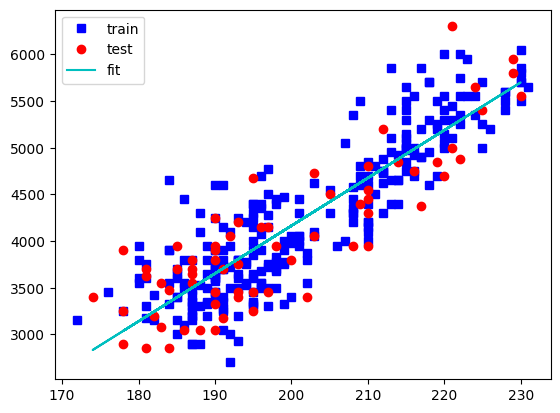

In [50]:
#run the code below and check the visual!

plt.plot(Xtrain["flipper_length_"], ytrain, 'bs', label="train")
plt.plot(Xtest["flipper_length_"], ytest, 'ro', label="test")
plt.plot(Xtest["flipper_length_"], ypred, 'c', label="fit")
plt.legend()
